In [32]:
import os
import numpy as np
import nibabel as nb
import tensorflow as tf

from scipy import ndimage
from mrtoct import ioutil, data

from matplotlib import pyplot as plt

In [19]:
def load_volume(filename):
    return nb.load(filename).get_data().astype(np.float32)

def smooth_volume(volume, sigma=3):
    return ndimage.gaussian_filter(volume, sigma)

In [49]:
encoder = ioutil.TFRecordEncoder()
options = ioutil.TFRecordOptions

writer = tf.python_io.TFRecordWriter('../data/tfrecord/training/masking.tfrecord', options)

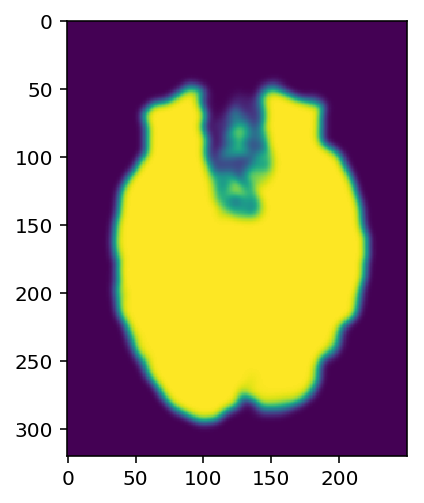

In [37]:
plt.imshow(z[120,:,:,0])

In [50]:
for filename in os.listdir('../data/nifti/masking/training'):
    if not filename.endswith('.nii.gz'):
        continue
        
    x = load_volume(f'../data/nifti/masking/training/{filename}')
    x = smooth_volume(x)
    x = ioutil.voxel_to_tensor_space(x)
    x *= 10000
    
    writer.write(encoder.encode(x))

In [51]:
writer.close()

In [52]:
iterator = (tf.data.TFRecordDataset('../data/tfrecord/training/masking.tfrecord', 'GZIP')
            .map(data.transform.DecodeExample())
            .make_one_shot_iterator()
            .get_next())

session = tf.Session()

mask = session.run(iterator)

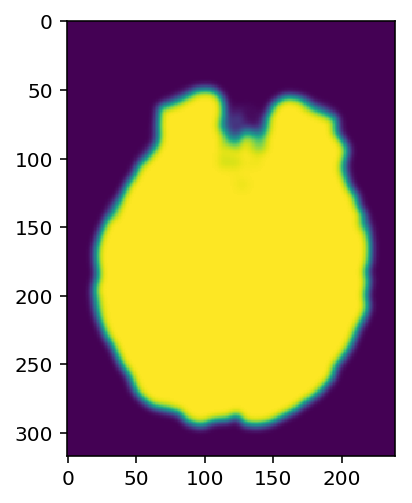

In [53]:
plt.imshow(mask[120,:,:,0])